In [17]:
pip install pymysql

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
from pymysql import connect
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
database = connect(host = 'localhost', 
                  user = 'root',
                  password = 'Ceaservyshu7&',
                  database = 'capstone_project')

In [20]:
cur = database.cursor()

In [21]:
query = 'SELECT * FROM home_loan_new_dti1;'

cur.execute(query)

792

In [22]:
df = pd.read_sql(query, database)

C:\Users\vyshn\AppData\Local\Temp\ipykernel_26104\305042412.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, database)


In [12]:
df.head()

loan_id  gender  age     AgeGroup marital_status  no_of_dependents  \
0      811  Female   19   < 20 years        Married                 3   
1     1232    Male   62  >= 60 years         Single                 2   
2      889    Male   22  20-30 years        Married                 0   
3      192  Female   20  20-30 years         Single                 1   
4     1185    Male   60  >= 60 years        Married                 0   

  educational_level employment_type geographical_location type_of_residence  \
0             Ph.D.        Salaried                 Urban             Owned   
1          Bachelor        Salaried                 Urban             Owned   
2            Master      Government                 Urban            Rented   
3            Master      Government                 Rural             Owned   
4             Ph.D.   Self-employed                 Urban      With Parents   

   ...  Loan_bins loan_term_yrs    term_bins  loan_purpose  approval_status  \
0  ...  1 Cr-2 Cr             5   5-10 years     Home Loan         Approved   
1  ...     0-1 Cr            15  15-20 years     Home Loan         Approved   
2  ...     0-1 Cr            25  >= 25 years     Home Loan         Approved   
3  ...  1 Cr-2 Cr            10  10-15 years     Home Loan         Approved   
4  ...  2 Cr-3 Cr            30  >= 25 years     Home Loan         Approved   

  previous_loan_experience  credit_history cibil_score  \
0                 Positive            Poor         448   
1                     None            Poor         512   
2                     None            Poor         405   
3                     None            Good         739   
4                     None            Fair         649   

            cibil_scorebins property_ownership  
0  600-649: Doubtfull Score             Rented  
1  600-649: Doubtfull Score              Owned  
2  600-649: Doubtfull Score             Rented  
3      700- 749: Good Score             Rented  
4  600-649: Doubtfull Score             Rented  

[5 rows x 33 columns]

In [8]:
df.tail()

loan_id  gender  age     AgeGroup marital_status  no_of_dependents  \
787      847    Male   49  40-50 years         Single                 4   
788      588    Male   64  >= 60 years         Single                 1   
789     1695    Male   21  20-30 years        Married                 1   
790     1283  Female   52  50-60 years         Single                 1   
791     1496  Female   47  40-50 years        Widowed                 4   

    educational_level employment_type geographical_location type_of_residence  \
787            Master      Unemployed                 Rural             Owned   
788          Bachelor        Salaried                 Urban             Owned   
789            Master        Salaried                 Rural             Owned   
790            Master        Salaried                 Urban            Rented   
791             Ph.D.      Government                 Rural             Owned   

     ...  Loan_bins loan_term_yrs    term_bins  loan_purpose  approval_status  \
787  ...     0-1 Cr            15  15-20 years     Home Loan         Approved   
788  ...  2 Cr-3 Cr            30  >= 25 years     Home Loan         Approved   
789  ...     0-1 Cr            15  15-20 years     Home Loan         Rejected   
790  ...  1 Cr-2 Cr            30  >= 25 years     Home Loan         Approved   
791  ...  2 Cr-3 Cr            15  15-20 years     Home Loan         Rejected   

    previous_loan_experience  credit_history cibil_score  \
787                 Positive       Very Good         778   
788                 Positive            Good         685   
789                 Positive            Fair         637   
790                 Positive            Fair         585   
791                 Positive            Good         671   

                 cibil_scorebins property_ownership  
787     750-900: Excellent Score             Rented  
788  650-699: Satisfactory Score              Owned  
789     600-649: Doubtfull Score             Rented  
790     600-649: Doubtfull Score             Rented  
791  650-699: Satisfactory Score             Rented  

[5 rows x 31 columns]

In [23]:
#Calculate the remaining salary
df['Remaining_Salary'] = df['MonthlySalary'] - df['monthly_obligations']

# Drop rows where the remaining salary is negative and the applicant is unemployed and the loan is approved
df = df[~((df['Remaining_Salary'] < 0) & (df['approval_status'] == 'Approved') & (df['employment_type'] == 'Unemployed'))]

# Drop rows where the employment type is 'Unemployed' and the loan is approved
df = df[~((df['employment_type'] == 'Unemployed') & (df['approval_status'] == 'Approved'))]

# Drop the 'Remaining_Salary' column if it's no longer needed
df = df.drop(columns=['Remaining_Salary'])

# Display the first few rows of the updated DataFrame to verify the changes
print("Updated DataFrame after filtering:")
print(df.head())

Updated DataFrame after filtering:
   loan_id  gender  age     AgeGroup marital_status  no_of_dependents  \
0      811  Female   19   < 20 years        Married                 3   
1     1232    Male   62  >= 60 years         Single                 2   
2      889    Male   22  20-30 years        Married                 0   
3      192  Female   20  20-30 years         Single                 1   
4     1185    Male   60  >= 60 years        Married                 0   

  educational_level employment_type geographical_location type_of_residence  \
0             Ph.D.        Salaried                 Urban             Owned   
1          Bachelor        Salaried                 Urban             Owned   
2            Master      Government                 Urban            Rented   
3            Master      Government                 Rural             Owned   
4             Ph.D.   Self-employed                 Urban      With Parents   

   ...  Loan_bins loan_term_yrs    term_bins  loan_

In [10]:
df.describe()

loan_id         age  no_of_dependents  income_annum  MonthlySalary  \
count   752.000000  752.000000        752.000000  7.520000e+02     752.000000   
mean   1029.897606   40.728723          1.978723  1.178284e+06   98190.336436   
std     580.046895   13.970325          1.402708  4.954928e+05   41291.067301   
min       6.000000   18.000000          0.000000  3.029480e+05   25246.000000   
25%     529.250000   28.000000          1.000000  7.355528e+05   61295.750000   
50%    1031.500000   40.000000          2.000000  1.204466e+06  100372.500000   
75%    1538.500000   53.000000          3.000000  1.621661e+06  135138.750000   
max    1997.000000   64.000000          4.000000  1.997229e+06  166436.000000   

       monthly_obligations  savings_account_balance  \
count           752.000000               752.000000   
mean          24132.525266            249480.543883   
std           14808.199659            143248.129391   
min              46.000000             10837.000000   
25%           11220.250000            124613.250000   
50%           23347.500000            246340.000000   
75%           37069.500000            370978.750000   
max           49996.000000            499905.000000   

       investment_portfolio_value  insurance_policies   loan_amount  \
count                  752.000000        7.520000e+02  7.520000e+02   
mean                499496.547872        2.431376e+06  1.527893e+07   
std                 275637.679644        1.398199e+06  8.979049e+06   
min                     59.000000        5.050300e+04  8.307700e+04   
25%                 270409.750000        1.192832e+06  7.127627e+06   
50%                 492979.500000        2.372505e+06  1.526646e+07   
75%                 742364.500000        3.627684e+06  2.329773e+07   
max                 999559.000000        4.999236e+06  2.998656e+07   

       loan_term_yrs  cibil_score  
count     752.000000   752.000000  
mean       17.819149   665.680851  
std         8.823872   164.761828  
min         5.000000     0.000000  
25%        10.000000   648.500000  
50%        20.000000   713.000000  
75%        25.000000   771.000000  
max        30.000000   900.000000

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 752 entries, 0 to 791
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_id                     752 non-null    int64  
 1   gender                      752 non-null    object 
 2   age                         752 non-null    int64  
 3   AgeGroup                    752 non-null    object 
 4   marital_status              752 non-null    object 
 5   no_of_dependents            752 non-null    int64  
 6   educational_level           752 non-null    object 
 7   employment_type             752 non-null    object 
 8   geographical_location       752 non-null    object 
 9   type_of_residence           752 non-null    object 
 10  income_annum                752 non-null    int64  
 11  income_buckets              752 non-null    object 
 12  MonthlySalary               752 non-null    float64
 13  monthly_obligations         752 non-null

the above graph shows that the cibil score with 750-900 has more approval rate of 73%, 600-649 and 650-699 has same approval rate of  68%. the cibil score with 700-749 has less approval rate compared with others 60%

In [12]:
# Approval Rate Vs CIBIL Score bins
approval_rates = df.groupby(['cibil_scorebins', 'approval_status']).size().unstack()
normalized_data=approval_rates.div(approval_rates.sum(axis=1),axis=0)*100
ax=normalized_data.plot(kind='bar',stacked=True,figsize=(12,8),width=0.4)


# Add data labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')
plt.xlabel('cibil scorebins')
plt.ylabel('Percentage of approval (%)')
plt.title('Cibil score Vs Aprroval Rate(%)')
plt.xticks(rotation=360)
        
# Adding the legend
plt.legend(title='Approval status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

In [14]:
# Overall Calculations
# Group by income buckets and approval status to count the occurrences
approval_vs_income = df.groupby(['income_buckets', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs Income Buckets:")
print(approval_vs_income)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='income_buckets', y='counts', hue='approval_status', data=approval_vs_income)
plt.title('Approval Status vs Income Buckets')
plt.xlabel('Income Buckets')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs Income Buckets:
  income_buckets approval_status  counts
0      0-5 Lakhs        Approved      48
1      0-5 Lakhs        Rejected      34
2    10-15 Lakhs        Approved     153
3    10-15 Lakhs        Rejected      69
4    15-20 Lakhs        Approved     166
5    15-20 Lakhs        Rejected      78
6     5-10 Lakhs        Approved     139
7     5-10 Lakhs        Rejected      65


In [15]:
# Overall Calculations
# Group by Savings bins and approval status to count the occurrences
approval_vs_income = df.groupby(['Savings_bins', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs Savings_bins:")
print(approval_vs_income)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Savings_bins', y='counts', hue='approval_status', data=approval_vs_income)
plt.title('Approval Status vs Savings')
plt.xlabel('Savings')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs Savings_bins:
  Savings_bins approval_status  counts
0         0-1L        Approved     102
1         0-1L        Rejected      44
2        1L-2L        Approved     115
3        1L-2L        Rejected      53
4        2L-3L        Approved      96
5        2L-3L        Rejected      49
6        3L-4L        Approved      93
7        3L-4L        Rejected      50
8        4L-5L        Approved     100
9        4L-5L        Rejected      50


In [15]:
# Overall Calculations
# Group by investments and approval status to count the occurrences
approval_vs_income = df.groupby(['investment_bins', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs investment_bins:")
print(approval_vs_income)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='investment_bins', y='counts', hue='approval_status', data=approval_vs_income)
plt.title('Approval Status vs Investment Protfolio')
plt.xlabel('Investments')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs investment_bins:
  investment_bins approval_status  counts
0            0-2L        Approved     108
1            0-2L        Rejected      33
2           2L-4L        Approved     105
3           2L-4L        Rejected      54
4           4L-6L        Approved      92
5           4L-6L        Rejected      58
6           6L-8L        Approved     126
7           6L-8L        Rejected      57
8          8L-10L        Approved      75
9          8L-10L        Rejected      44


In [16]:
# Overall Calculations
# Group by investments and approval status to count the occurrences
approval_vs_income = df.groupby(['insurance_bins', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs insurance_bins:")
print(approval_vs_income)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='insurance_bins', y='counts', hue='approval_status', data=approval_vs_income)
plt.title('Approval Status vs Insurance bins')
plt.xlabel('Insurance policy')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs insurance_bins:
  insurance_bins approval_status  counts
0          0-10L        Approved      96
1          0-10L        Rejected      50
2        10L-20L        Approved     117
3        10L-20L        Rejected      45
4        20L-30L        Approved      98
5        20L-30L        Rejected      56
6        30L-40L        Approved     111
7        30L-40L        Rejected      47
8        40L-50L        Approved      84
9        40L-50L        Rejected      48


Approval Status vs Loan_bins:
   Loan_bins approval_status  counts
0     0-1 Cr        Approved     171
1     0-1 Cr        Rejected      86
2  1 Cr-2 Cr        Approved     157
3  1 Cr-2 Cr        Rejected      74
4  2 Cr-3 Cr        Approved     178
5  2 Cr-3 Cr        Rejected      86


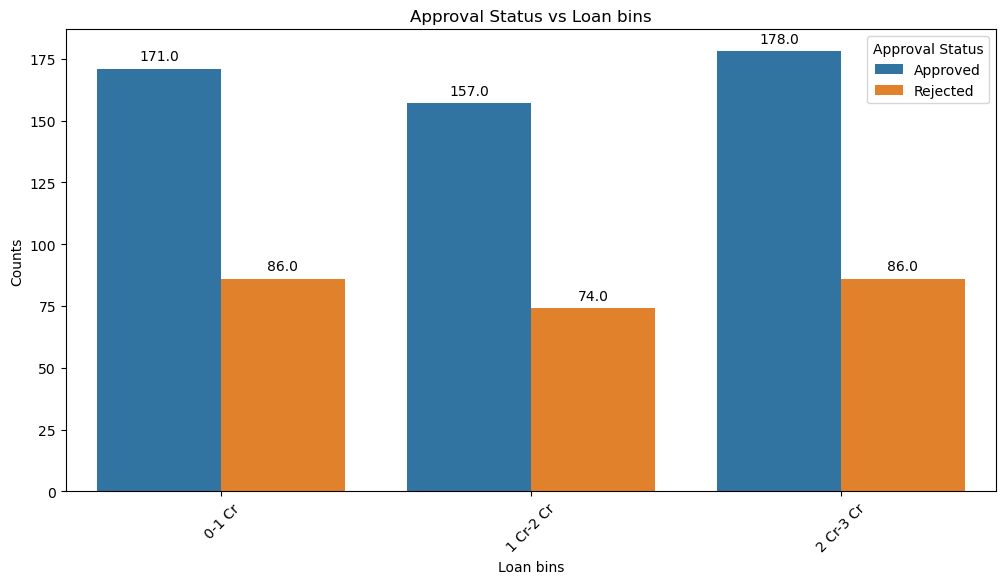

In [17]:
# Overall Calculations
# Group by Loan bins and approval status to count the occurrences
approval_vs_income = df.groupby(['Loan_bins', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs Loan_bins:")
print(approval_vs_income)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Loan_bins', y='counts', hue='approval_status', data=approval_vs_income)
plt.title('Approval Status vs Loan bins')
plt.xlabel('Loan bins')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

In [16]:
# Overall Calculations
# Group by Term and approval status to count the occurrences
approval_vs_income = df.groupby(['loan_term_yrs', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs loan_term_yrs:")
print(approval_vs_income)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='loan_term_yrs', y='counts', hue='approval_status', data=approval_vs_income)
plt.title('Approval Status vs loan_term_yrs')
plt.xlabel('loan_term_yrs')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs loan_term_yrs:
    loan_term_yrs approval_status  counts
0               5        Approved      96
1               5        Rejected      37
2              10        Approved      80
3              10        Rejected      33
4              15        Approved      88
5              15        Rejected      37
6              20        Approved      72
7              20        Rejected      30
8              25        Approved      83
9              25        Rejected      53
10             30        Approved      87
11             30        Rejected      56


Approval Status vs Previous loan exp:
  previous_loan_experience approval_status  counts
0                 Negative        Approved      47
1                 Negative        Rejected      31
2                     None        Approved     241
3                     None        Rejected     119
4                 Positive        Approved     218
5                 Positive        Rejected      96


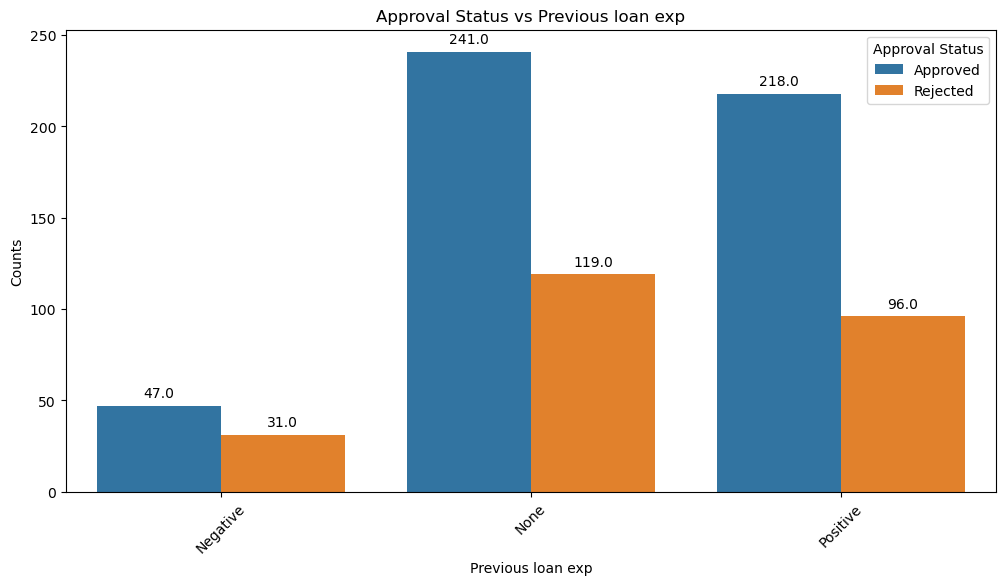

In [18]:
# Group by Loan bins and approval status to count the occurrences
approval_vs_income = df.groupby(['previous_loan_experience', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs Previous loan exp:")
print(approval_vs_income)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='previous_loan_experience', y='counts', hue='approval_status', data=approval_vs_income)
plt.title('Approval Status vs Previous loan exp')
plt.xlabel('Previous loan exp')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

In [19]:
# Group by Loan bins and approval status to count the occurrences
approval_vs_income = df.groupby(['credit_history', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs credit history:")
print(approval_vs_income)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='credit_history', y='counts', hue='approval_status', data=approval_vs_income)
plt.title('Approval Status vs credit_history')
plt.xlabel('credit_history')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs credit history:
   credit_history approval_status  counts
0       Excellent        Approved      51
1       Excellent        Rejected      22
2            Fair        Approved      25
3            Fair        Rejected      12
4            Good        Approved     190
5            Good        Rejected     108
6           NA/NH        Approved      12
7           NA/NH        Rejected       1
8            Poor        Approved      91
9            Poor        Rejected      48
10      Very Good        Approved     137
11      Very Good        Rejected      55


In [13]:
# Group the data by CIBIL score bins and loan bins
grouped_data = df.groupby(['cibil_scorebins', 'Loan_bins']).size().unstack()

# Plot the bar chart
grouped_data.plot(kind='bar', figsize=(12, 8))
plt.xlabel('CIBIL Score Bins')
plt.ylabel('Count')
plt.title('Count of Loan Bins by CIBIL Score Bins')
plt.xticks(rotation=45)
plt.legend(title='Loan Bins', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

Demographics

In [14]:
# Group by gender and count the occurrences
gender_counts = df['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'counts']

# Display the result
print("Total number of applicants gender-wise:")
print(gender_counts)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts['counts'], labels=gender_counts['gender'], autopct='%1.1f%%', startangle=140)
plt.title('Total Number of Applicants Gender-wise')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Total number of applicants gender-wise:
   gender  counts
0    Male     394
1  Female     386
2   Other      12


In [16]:
# Group by AgeGroup and approval status to count the occurrences
approval_vs_Age = df.groupby(['AgeGroup', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs AgeGroup:")
print(approval_vs_Age)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='AgeGroup', y='counts', hue='approval_status', data=approval_vs_Age)
plt.title('Approval Status vs AgeGroup')
plt.xlabel('AgeGroup')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs AgeGroup:
       AgeGroup approval_status  counts
0   20-30 years        Approved     122
1   20-30 years        Rejected      59
2   30-40 years        Approved     114
3   30-40 years        Rejected      46
4   40-50 years        Approved     105
5   40-50 years        Rejected      52
6   50-60 years        Approved     116
7   50-60 years        Rejected      46
8    < 20 years        Approved      22
9    < 20 years        Rejected      16
10  >= 60 years        Approved      67
11  >= 60 years        Rejected      27


In [25]:
# Group by marital_status and approval status to count the occurrences
approval_vs_maritial = df.groupby(['marital_status', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs marital_status:")
print(approval_vs_maritial)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='marital_status', y='counts', hue='approval_status', data=approval_vs_maritial)
plt.title('Approval Status vs AgeGroup')
plt.xlabel('marital_status')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs marital_status:
  marital_status approval_status  counts
0       Divorced        Approved      75
1       Divorced        Rejected      38
2        Married        Approved     259
3        Married        Rejected     127
4         Single        Approved     151
5         Single        Rejected      67
6        Widowed        Approved      21
7        Widowed        Rejected      14


Approval Status vs no_of_dependents:
   no_of_dependents approval_status  counts
0                 0        Approved      91
1                 0        Rejected      49
2                 1        Approved     123
3                 1        Rejected      56
4                 2        Approved      94
5                 2        Rejected      44
6                 3        Approved      98
7                 3        Rejected      49
8                 4        Approved     100
9                 4        Rejected      48


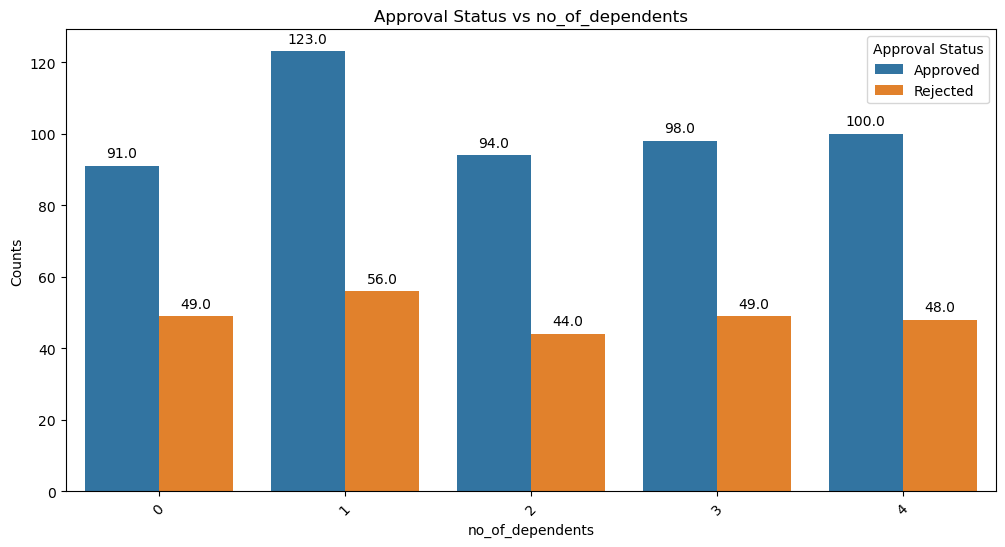

In [26]:
# Group by no_of_dependents and approval status to count the occurrences
approval_vs_dependents = df.groupby(['no_of_dependents', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs no_of_dependents:")
print(approval_vs_dependents)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='no_of_dependents', y='counts', hue='approval_status', data=approval_vs_dependents)
plt.title('Approval Status vs no_of_dependents')
plt.xlabel('no_of_dependents')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs educational_level:
  educational_level approval_status  counts
0          Bachelor        Approved     220
1          Bachelor        Rejected      99
2       High School        Approved      49
3       High School        Rejected      24
4            Master        Approved     186
5            Master        Rejected      98
6             Ph.D.        Approved      51
7             Ph.D.        Rejected      25


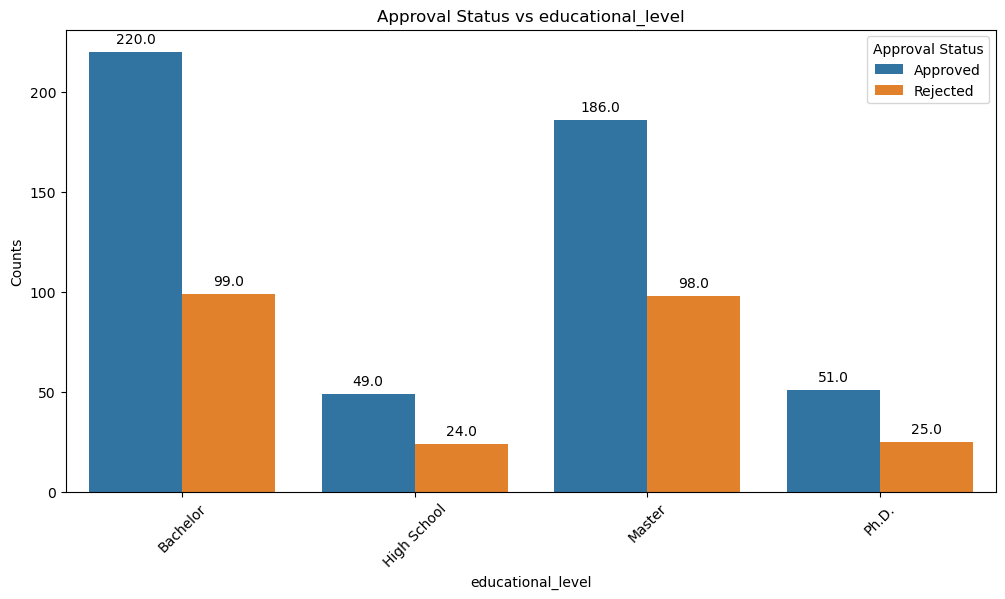

In [27]:

# Group by educational_level and approval status to count the occurrences
approval_vs_edu = df.groupby(['educational_level', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs educational_level:")
print(approval_vs_edu)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='educational_level', y='counts', hue='approval_status', data=approval_vs_edu)
plt.title('Approval Status vs educational_level')
plt.xlabel('educational_level')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()


Approval Status vs educational_level:
  employment_type approval_status  counts
0      Government        Approved      80
1      Government        Rejected      38
2        Salaried        Approved     270
3        Salaried        Rejected     126
4   Self-employed        Approved     156
5   Self-employed        Rejected      70
6      Unemployed        Rejected      12


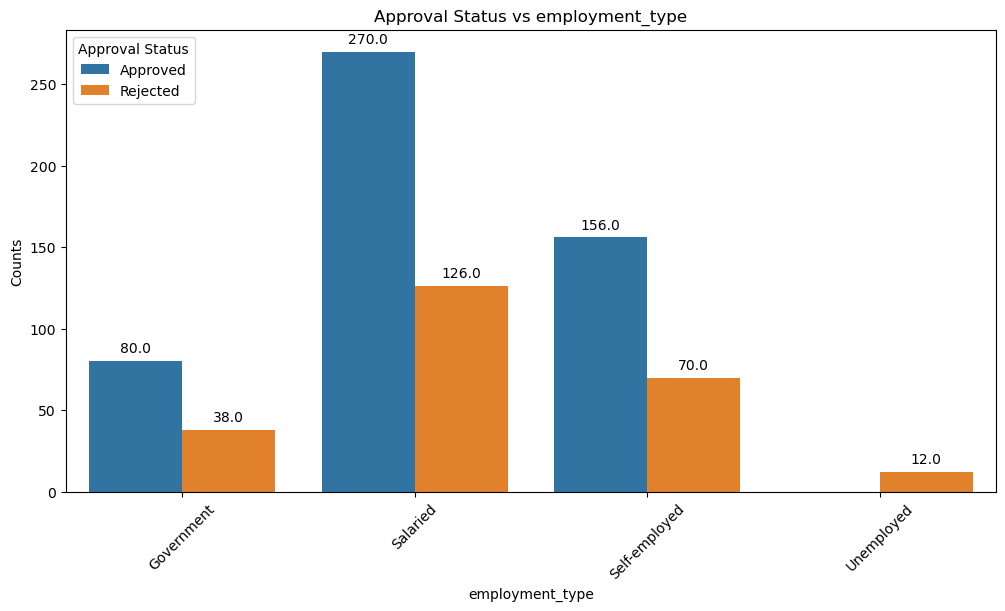

In [28]:
# Group by employment_type and approval status to count the occurrences
approval_vs_emp = df.groupby(['employment_type', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs educational_level:")
print(approval_vs_emp)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='employment_type', y='counts', hue='approval_status', data=approval_vs_emp)
plt.title('Approval Status vs employment_type')
plt.xlabel('employment_type')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()


Approval Status vs geographical_location:
  geographical_location approval_status  counts
0                 Rural        Approved     151
1                 Rural        Rejected      85
2                 Urban        Approved     355
3                 Urban        Rejected     161


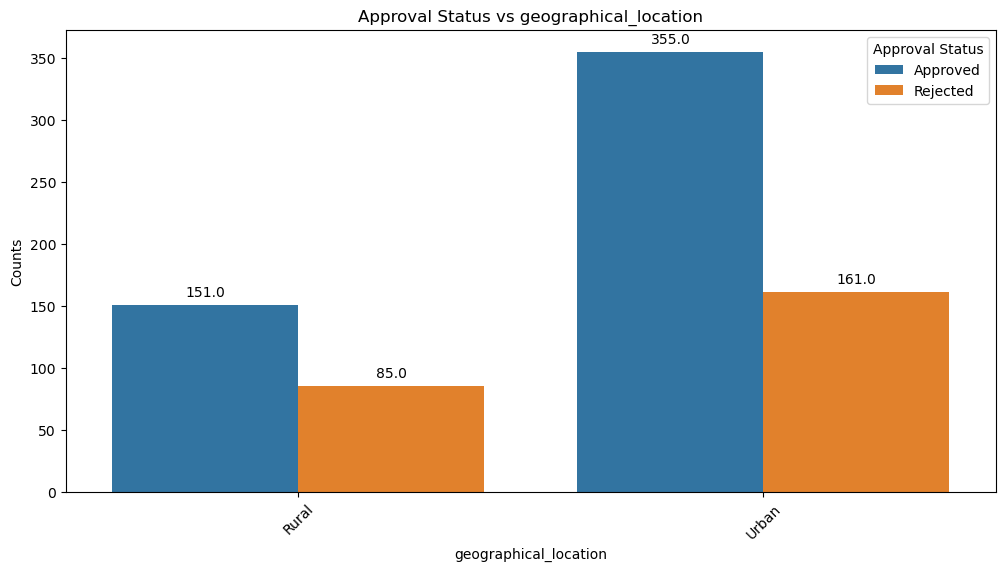

In [29]:

# Group by geographical_location and approval status to count the occurrences
approval_vs_loc = df.groupby(['geographical_location', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs geographical_location:")
print(approval_vs_loc)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='geographical_location', y='counts', hue='approval_status', data=approval_vs_loc)
plt.title('Approval Status vs geographical_location')
plt.xlabel('geographical_location')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()


Approval Status vs type_of_residence:
  type_of_residence approval_status  counts
0             Owned        Approved     308
1             Owned        Rejected     147
2            Rented        Approved     144
3            Rented        Rejected      73
4      With Parents        Approved      54
5      With Parents        Rejected      26


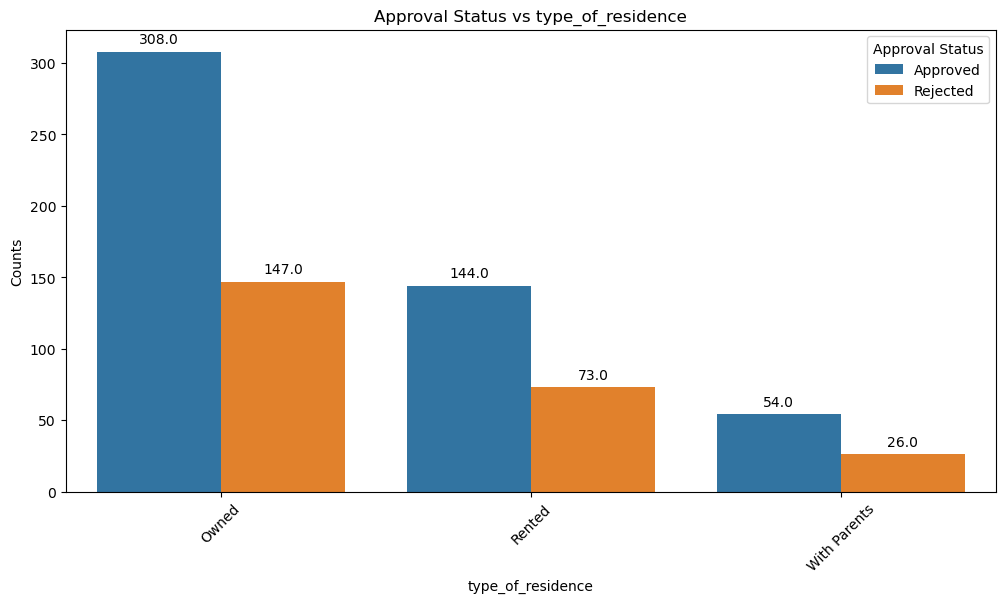

In [30]:
# Group by type_of_residence and approval status to count the occurrences
approval_vs_res = df.groupby(['type_of_residence', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs type_of_residence:")
print(approval_vs_res)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='type_of_residence', y='counts', hue='approval_status', data=approval_vs_res)
plt.title('Approval Status vs type_of_residence')
plt.xlabel('type_of_residence')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()


Approval Status vs property_ownership:
  property_ownership approval_status  counts
0              Owned        Approved     370
1              Owned        Rejected     156
2             Rented        Approved     136
3             Rented        Rejected      90


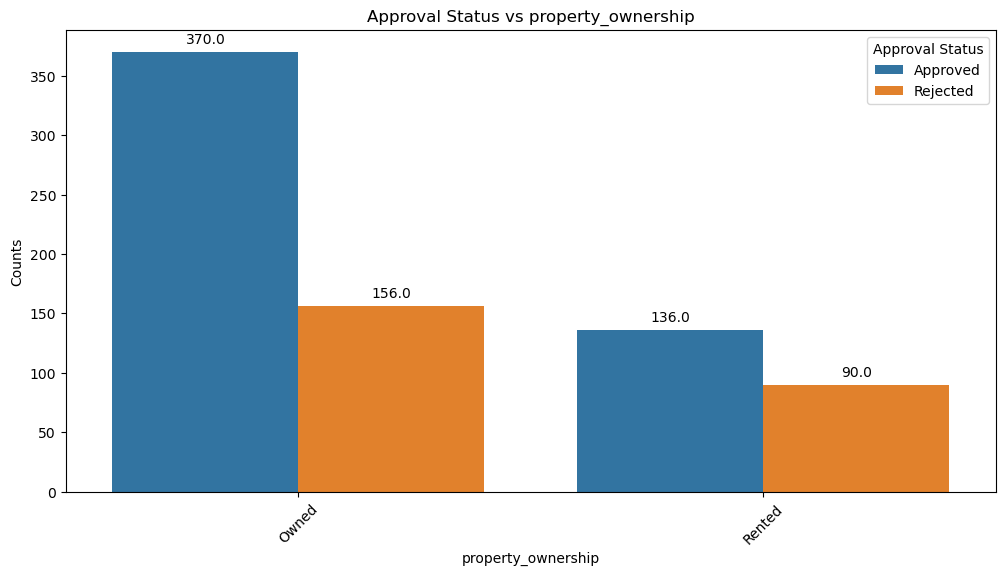

In [31]:

# Group by property_ownership and approval status to count the occurrences
approval_vs_own = df.groupby(['property_ownership', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs property_ownership:")
print(approval_vs_own)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='property_ownership', y='counts', hue='approval_status', data=approval_vs_own)
plt.title('Approval Status vs property_ownership')
plt.xlabel('property_ownership')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()
